In [105]:

import numpy as np
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd
from sklearn.cluster import KMeans
# Output of plotting commands is displayed inline within the Jupyter notebook.
import seaborn as sns

# # Set a seed so that the results are consistent.
# np.random.seed(3) 

In [106]:
df = pd.read_csv('scraped_data_only_gianha_2_new.csv',encoding='utf-8')
df.rename(columns={'Diện tích':'area', 
                   'Mức giá' : 'price',
                   'Số phòng ngủ': 'num_of_bedrooms',
                   'Số toilet': 'num_of_toilets',
                   'Pháp lý': 'legal_status',
                   'Nội thất': 'furniture',
                   'Latitude':'latitude',
                   'Longitude':'longitude',
                   'Mặt tiền': 'facade_width',
                   'Đường vào': 'access_road_width',
                   'Hướng nhà': 'house_direction', 
                   'Hướng ban công': 'balcony_direction', 
                   'Số tầng': 'num_of_stories'},
                   inplace=True)
df

,area,price,num_of_stories,num_of_bedrooms,num_of_toilets,latitude,longitude,facade_width,access_road_width,house_direction,balcony_direction,legal_status,furniture
0,46 m²,8 tỷ,4 tầng,4 phòng,4 phòng,16.060087,108.213548,NaN,NaN,NaN,NaN,NaN,NaN
1,47 m²,"3,15 tỷ",3 tầng,3 phòng,2 phòng,16.059497,108.185897,5 m,"2,5 m",Đông - Bắc,NaN,Sổ đỏ/ Sổ hồng,Cơ bản
2,490 m²,Thỏa thuận,2 tầng,2 phòng,2 phòng,15.992632,108.269371,NaN,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng,Cơ bản
3,552 m²,24 tỷ,2 tầng,4 phòng,NaN,16.017023,108.260246,NaN,NaN,Đông - Nam,Tây,NaN,NaN
4,5.000 m²,Thỏa thuận,NaN,NaN,NaN,15.960981,108.289269,180 m,33 m,Đông - Bắc,NaN,Đang chờ sổ,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998,65 m²,2.79 tỷ,2,3,2,NaN,NaN,4.5 m,15 m,NaN,NaN,Sổ đỏ,NaN
5999,130 m²,3 tỷ,3,4,3,NaN,NaN,5 m,26 m,NaN,NaN,Sổ đỏ,NaN
6000,175 m²,6.49 tỷ,4,4,4,NaN,NaN,7 m,25 m,NaN,NaN,Sổ đỏ,NaN
6001,67 m²,9.8 tỷ,3,3,3,NaN,NaN,5 m,16 m,NaN,NaN,Sổ đỏ,NaN


In [107]:
columns_to_drop = ['legal_status', 'furniture', 'facade_width', 'access_road_width', 'house_direction', 'balcony_direction','latitude','longitude']

In [108]:
df = df.drop(columns=columns_to_drop)
df

,area,price,num_of_stories,num_of_bedrooms,num_of_toilets
0,46 m²,8 tỷ,4 tầng,4 phòng,4 phòng
1,47 m²,"3,15 tỷ",3 tầng,3 phòng,2 phòng
2,490 m²,Thỏa thuận,2 tầng,2 phòng,2 phòng
3,552 m²,24 tỷ,2 tầng,4 phòng,NaN
4,5.000 m²,Thỏa thuận,NaN,NaN,NaN
...,...,...,...,...,...
5998,65 m²,2.79 tỷ,2,3,2
5999,130 m²,3 tỷ,3,4,3
6000,175 m²,6.49 tỷ,4,4,4
6001,67 m²,9.8 tỷ,3,3,3


In [109]:
def clean_and_calculate_price(row):
    price = row['price']
    area = row['area']
    
    # Skip rows where price or area is None or empty
    if not price or not area:
        return None
    
    # Process the price value
    price = price.lower()
    
    # Handle 'thỏa thuận'
    if 'thỏa thuận' in price:
        return None
    
    # Handle 'triệu/m²' by calculating total price based on area
    if 'triệu/m²' in price:
        try:
            price_per_m2 = float(price.replace('triệu/m²', '').strip().replace(',', '.'))
            area_value = float(area.replace('m²', '').strip().replace(',', '.'))
            total_price = (price_per_m2 * area_value) / 1000  # Convert to 'tỷ'
            return total_price
        except ValueError:
            return None
    
    # Convert 'triệu' to 'tỷ' and handle normal 'tỷ' values
    try:
        if 'triệu' in price:
            return float(price.replace('triệu', '').replace(',', '.').strip()) / 1000
        elif 'tỷ' in price:
            return float(price.replace('tỷ', '').replace(',', '.').strip())
        else:
            return None
    except ValueError:
        return None

In [110]:
df['price'] = df.apply(clean_and_calculate_price, axis=1)
df.head(10)

,area,price,num_of_stories,num_of_bedrooms,num_of_toilets
0,46 m²,8.00,4 tầng,4 phòng,4 phòng
1,47 m²,3.15,3 tầng,3 phòng,2 phòng
2,490 m²,NaN,2 tầng,2 phòng,2 phòng
3,552 m²,24.00,2 tầng,4 phòng,NaN
4,5.000 m²,NaN,NaN,NaN,NaN
5,600 m²,360.00,19 tầng,NaN,NaN
6,180 m²,41.00,NaN,30 phòng,30 phòng
7,108 m²,18.50,NaN,NaN,NaN
8,115 m²,7.00,7 tầng,6 phòng,7 phòng
9,"67,8 m²",5.70,NaN,2 phòng,NaN


In [111]:

def clean_area(area):
    if isinstance(area,str):
        return float(area.lower().replace('m²','').replace('.','').replace(',','.').strip())
    return area

def clean_rooms(value):
    if isinstance(value,str):
        return float(value.lower().replace('phòng','').strip())
    return value

def clean_stories(value):
    if isinstance(value, str):
        if '5+' in value:
            return None 
        value = value.lower().replace('tầng', '').strip() 
        return float(value)
    return value

In [112]:
df['area'] = df['area'].apply(clean_area)
df.head(10)


,area,price,num_of_stories,num_of_bedrooms,num_of_toilets
0,46.0,8.00,4 tầng,4 phòng,4 phòng
1,47.0,3.15,3 tầng,3 phòng,2 phòng
2,490.0,NaN,2 tầng,2 phòng,2 phòng
3,552.0,24.00,2 tầng,4 phòng,NaN
4,5000.0,NaN,NaN,NaN,NaN
5,600.0,360.00,19 tầng,NaN,NaN
6,180.0,41.00,NaN,30 phòng,30 phòng
7,108.0,18.50,NaN,NaN,NaN
8,115.0,7.00,7 tầng,6 phòng,7 phòng
9,67.8,5.70,NaN,2 phòng,NaN


In [113]:
df['num_of_bedrooms'] = df['num_of_bedrooms'].apply(clean_rooms)
df['num_of_toilets'] = df['num_of_toilets'].apply(clean_rooms)
df['num_of_stories'] = df['num_of_stories'].apply(clean_stories)

df.head(10)

,area,price,num_of_stories,num_of_bedrooms,num_of_toilets
0,46.0,8.00,4.0,4.0,4.0
1,47.0,3.15,3.0,3.0,2.0
2,490.0,NaN,2.0,2.0,2.0
3,552.0,24.00,2.0,4.0,NaN
4,5000.0,NaN,NaN,NaN,NaN
5,600.0,360.00,19.0,NaN,NaN
6,180.0,41.00,NaN,30.0,30.0
7,108.0,18.50,NaN,NaN,NaN
8,115.0,7.00,7.0,6.0,7.0
9,67.8,5.70,NaN,2.0,NaN


In [114]:
df.count()

area               6003
price              5693
num_of_stories     5250
num_of_bedrooms    5191
num_of_toilets     5013
dtype: int64

In [115]:
def remove_outlier_usingIQR(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [116]:
cleaned_df = df.copy()

In [117]:
columns_to_clean = ['area','price','num_of_stories','num_of_bedrooms','num_of_toilets']
for column in columns_to_clean:
    cleaned_df = remove_outlier_usingIQR(cleaned_df, column)
cleaned_df.describe()

,area,price,num_of_stories,num_of_bedrooms,num_of_toilets
count,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000
mean,82.221850,5.559835,2.484651,3.114099,2.857919
std,31.688619,3.260786,0.812167,0.859423,1.097761
min,2.000000,0.090000,1.000000,2.000000,1.000000
25%,60.000000,3.200000,2.000000,3.000000,2.000000
50%,80.000000,4.700000,2.000000,3.000000,3.000000
75%,100.000000,6.800000,3.000000,4.000000,4.000000
max,198.000000,17.600000,4.000000,5.000000,7.000000


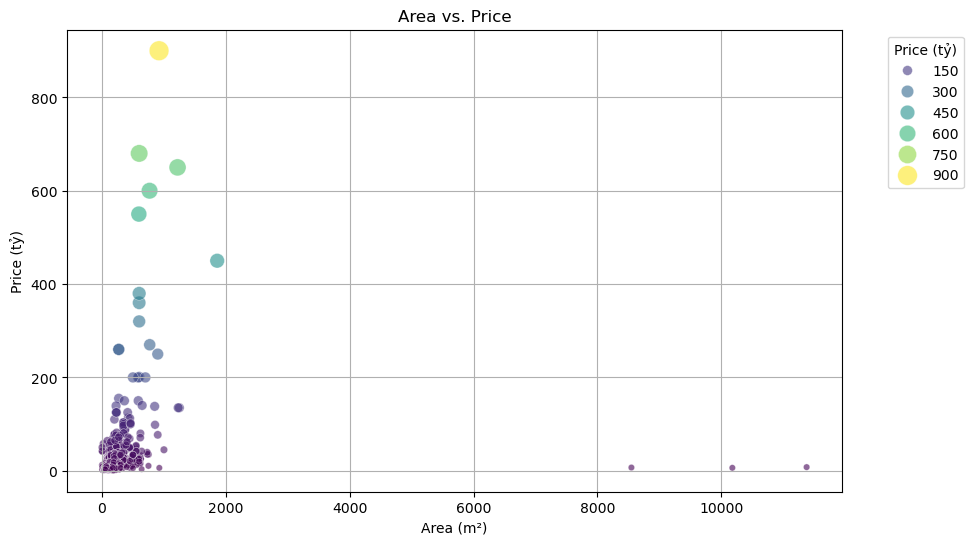

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df, alpha=0.6, size='price', sizes=(20, 200), hue='price', palette='viridis')
plt.title('Area vs. Price')
plt.xlabel('Area (m²)')
plt.ylabel('Price (tỷ)')
plt.grid(True)
plt.legend(title='Price (tỷ)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
thresholds = [
    (100, 2.5), 
    (175, 4.0), 
]

# Apply the filters to clean out unrealistic data
for area_threshold, price_threshold in thresholds:
    cleaned_df = cleaned_df[~((cleaned_df['area'] > area_threshold) & (cleaned_df['price'] < price_threshold))]

# Check the filtered data statistics again
cleaned_df.describe()

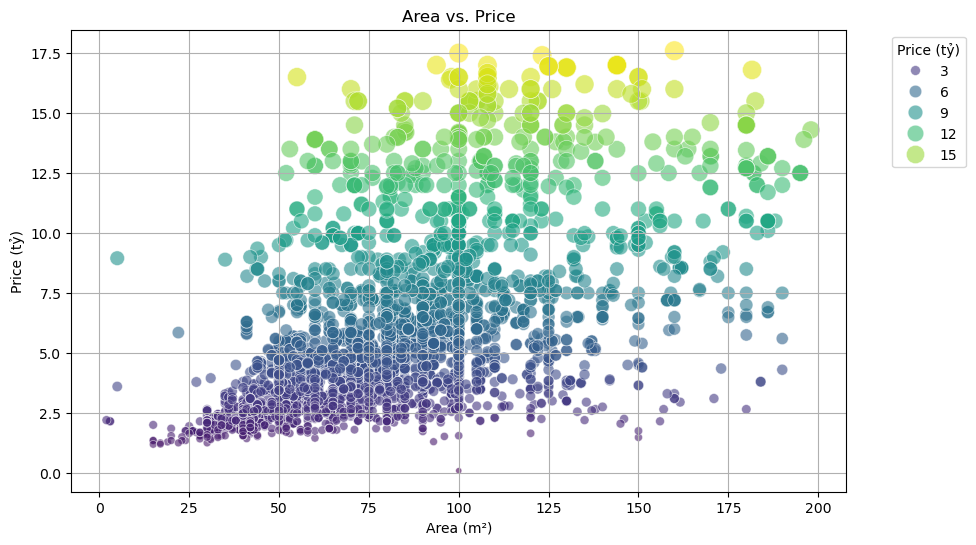

In [119]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=cleaned_df, alpha=0.6, size='price', sizes=(20, 200), hue='price', palette='viridis')
plt.title('Area vs. Price')
plt.xlabel('Area (m²)')
plt.ylabel('Price (tỷ)')
plt.grid(True)
plt.legend(title='Price (tỷ)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()